# Section 2.8 — Probability models for random samples

This notebook contains the code examples from [Section 2.8 Probability models for random samples]() of the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from plot_helpers import gen_samples
from plot_helpers import plot_samples
from plot_helpers import plot_samples_panel
from plot_helpers import gen_sampling_dist
from plot_helpers import plot_sampling_dist
from plot_helpers import plot_sampling_dists_panel

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

# # silence annoying warnings
# import warnings; warnings.filterwarnings('ignore')

In [3]:
# set random seed for repeatability
np.random.seed(42)

## Definitions

- $X$: a random variable with probability distribution $f_X$
- $\mathbf{X} = (X_1,X_2,X_3, \ldots, X_n)$: *random sample* of size $n$.
  Each $X_i$ is independent copy of the random variable $X \sim f_X$.
- $\mathbf{x} = (x_1,x_2, \ldots, x_n)$: a *particular sample*,
    which consists of $n$ observations from the distribution $f_X$.
- **statistic**: any function computed from a particular sample $\mathbf{x}$.
- **sampling distribution of statistic**:
    the variability of a statistic when computed on a random sample $\mathbf{X}$

## Sample statistics

A statistics is any function we compute from a sample $\mathbf{x}$.

Examples of sample statistics:
- sample mean $\overline{\mathbf{x}} = \frac{1}{n}\sum_{i=1}^n x_i$
- sample variance $s^2 = \frac{1}{n-1}\sum_{i=1}^n \left(x_i-\overline{\mathbf{x}}\right)^2$
- median $F_{\mathbf{x}}^{-1}(\frac{1}{2})$, where $F_{\mathbf{x}}^{-1}$ is the inverse of the empirical CDF.
- 90th percentile $F_{\mathbf{x}}^{-1}(0.9)$


### Sample mean

Let's focus on the sample mean:

$$
  \overline{x} = \frac{1}{n}\sum_{i=1}^n x_i = \texttt{mean(} \mathbf{x} \texttt{)}
$$


In [4]:
def mean(sample):
    """
    Compute the mean of the values in `sample`.
    """
    return sum(sample) / len(sample)

In [5]:
mean([1,3,11])

5.0

### Example 1.1: Samples from a uniform distribution


In [6]:
from scipy.stats import uniform
rvU = uniform(0,1)

In [7]:
mean(rvU.rvs(10))

0.5201367359526748

In [8]:
mean(rvU.rvs(100))

0.459360440874598

In [9]:
mean(rvU.rvs(1000))

0.49846377158147603

In [10]:
mean(rvU.rvs(1000000))

0.5003560391875443

### Example 1.2: Samples from the normal


In [11]:
from scipy.stats import norm
rvZ = norm(0,1)

In [12]:
np.random.seed(123)

In [13]:
mean(rvZ.rvs(10))

-0.26951611032632794

In [14]:
mean(rvZ.rvs(100))

0.04528630589790067

In [15]:
mean(rvZ.rvs(1000))

-0.03750017240797483

In [16]:
mean(rvZ.rvs(1000000))

0.0006794219838587821

### Example 1.3: Samples from the exponential distribution


In [17]:
from scipy.stats import expon
lam = 0.2
rvE = expon(0, 1/lam)

In [18]:
np.random.seed(123)

In [19]:
mean(rvE.rvs(10))

5.334172048766929

In [20]:
mean(rvE.rvs(100))

4.488399438411224

In [21]:
mean(rvE.rvs(1000))

4.964101264394126

In [22]:
mean(rvE.rvs(1000000))

4.996982168599892

### Law of large numbers

TODO: demo of some sort as sample size increases

maybe using all three examples...

## Sampling distributions of statistics

Consider any function $g$ computed based on a sample of size $n$.
We'll talk about the sample mean (defined as the Python function `mean` above),
but the concept applies to any function $g$.

Functions computed from samples are called *statistics*.
you're already familiar with several of these functions (mean, variance, standard deviation).
For now we'll keep calling them functions to make the connection with math concept of a function cleared, and also to facilitate the hands-on calculations using Python functions.

Given the random sample $\mathbf{X}$,
the quantity  $g(\mathbf{X})$ is a random variable. 
This should make sense intuitively,
since the inputs to the function $\mathbf{X}$ are random, the output of the function is also random.

The probability distribution of the random variable $g(\mathbf{X})$ is called the **sampling distribution** of $g$.

### Generating observations from the sampling distribution

The function `gen_sampling_dist` generates `N` samples of size `n` from the random variable object `rv`
and calculates the values of statistic function `statfunc` from each of the samples.
The function returns a lists of the values of the statistic calculated from each sample.

In [23]:
def gen_sampling_dist(rv, statfunc, n=30, N=1000):
    stats = []
    for i in range(0, N):
        sample = rv.rvs(n)
        stat = statfunc(sample)
        stats.append(stat)
    return stats

We can plot a histogram of the sampling distribution
by calling `sns.histplot(stats)`.
We can also generate a strip plot using `sns.stripplot(x=stats, marker="D")`,
specifying the `D` (diamond) marker to indicate we are plotting the means from each sample.

The plot helper function `plot_sampling_dist(stats)` generates a combined plot that
shows both a histogram and a scatter plot,
as shown in the figures below.

In [24]:
from scipy.stats import t as tdist
df = 7
rvT = tdist(df=73)

tbars = gen_sampling_dist(rvT, statfunc=mean, N=1000, n=30)
tbars[0:10]

[0.2546629162847764,
 -0.052805898240538746,
 0.10989680612229603,
 -0.1252411111148421,
 -0.30134098448585095,
 0.18245499973804416,
 -0.3919513998786795,
 -0.21461552521963348,
 -0.2140129421919345,
 0.20552369335691717]

<AxesSubplot:ylabel='Count'>

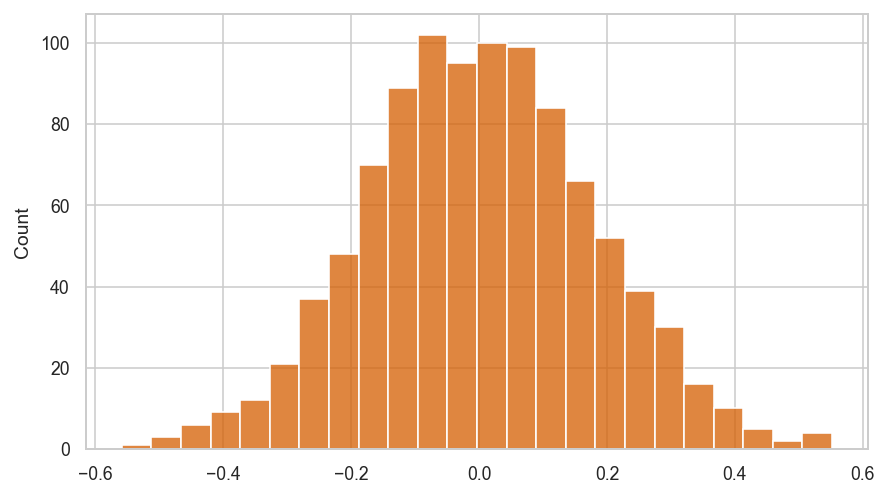

In [25]:
sns.histplot(tbars, color="r")

<AxesSubplot:>

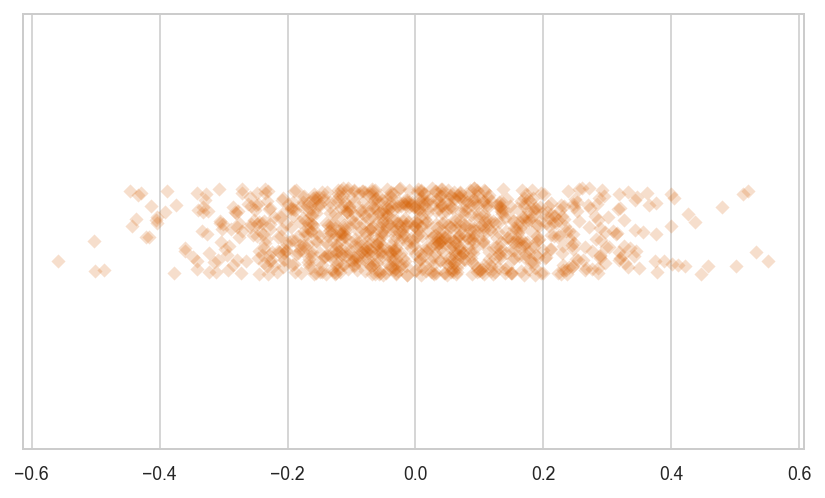

In [26]:
sns.stripplot(x=tbars, marker="D", alpha=0.2, color="r")

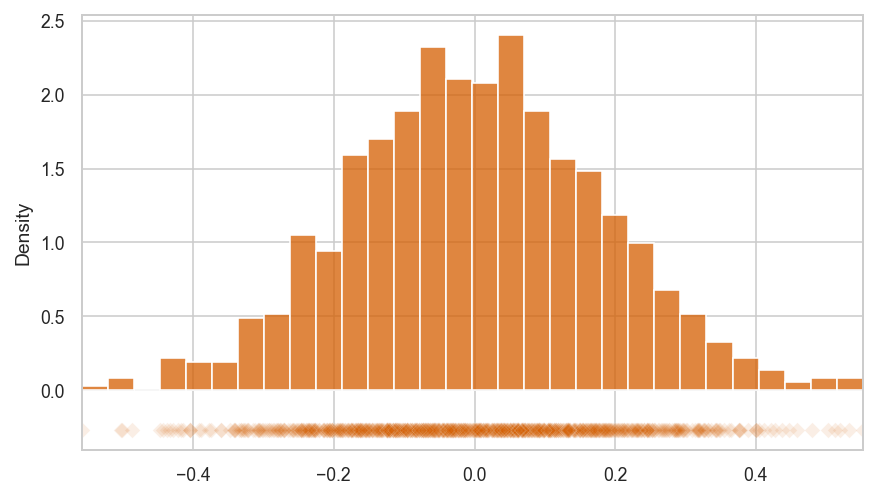

In [27]:
plot_sampling_dist(tbars)

### Example 1 (continued): sampling distribution of the mean

Let's define a random variable `rvU` $\sim \mathcal{U}(0,1)$.

In [28]:
from scipy.stats import uniform

rvU = uniform(0,1)

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

In [29]:
N = 10   # number of samples
n = 30   # sample size

# generate N samples from (U_1,U_2,...,U_n)
usamples = {}
for i in range(0, N):
    column_name = "sample" + str(i)
    usamples[column_name] = rvU.rvs(n)

# usamples

In the last line we converted the dictionary `usamples` to a Pandas data frame `usamples_df`,
which will make plotting easier.


In [30]:
# convert usamples to a Pandas data frame
usamples_df = pd.DataFrame(usamples)
usamples_df.shape
# usamples_df

(30, 10)

To obtain a strip plot of all the samples,
we can simply call the Seaborn function `stripplot` on the data frame `usamples_df`.

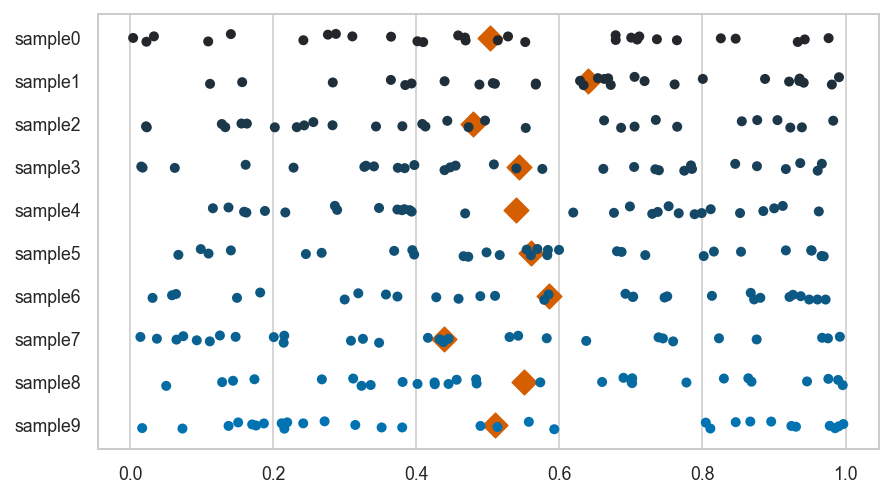

In [31]:
# generate strip plot
ax = sns.stripplot(usamples_df, orient="h", palette="dark:b")

# add diamond-shaped marker to indicate mean in each sample
for i in range(0, N):
    column_name = "sample" + str(i)
    ubar_i = usamples_df[column_name].mean()
    ax.scatter(ubar_i, i, marker="D", s=75, color="r")

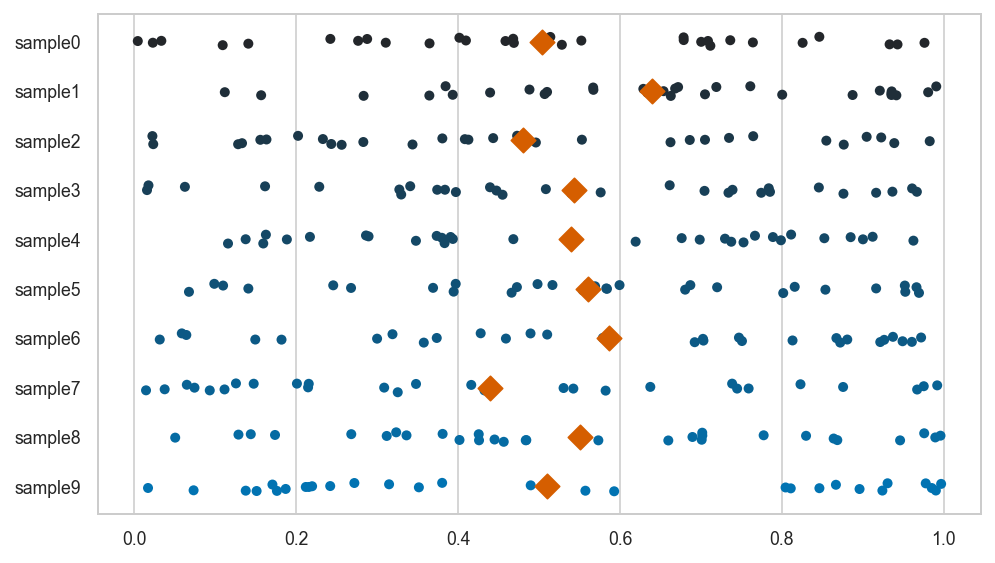

In [32]:
filename = "figures/prob/samples_from_U01.pdf"
plot_samples(usamples_df, filename=filename)

**Visualizing the sampling distribution of the mean.**  
Let's now generate $N=1000$ samples $\mathbf{u}_1, \mathbf{u}_2, \mathbf{u}_3, \ldots, \mathbf{u}_N$, compute the mean of each sample $\overline{\mathbf{u}_1}, \overline{\mathbf{u}_2}, \overline{\mathbf{u}_3}, \ldots, \overline{\mathbf{u}_N}$,
then plot a histogram of the means.

In [33]:
# OLD
# N = 1000  # number of samples
# n = 30    # sample size
# ubars = []
# for i in range(0, N):
#     usample = rvU.rvs(n)
#     ubar = mean(usample)
#     ubars.append(ubar)

<AxesSubplot:ylabel='Count'>

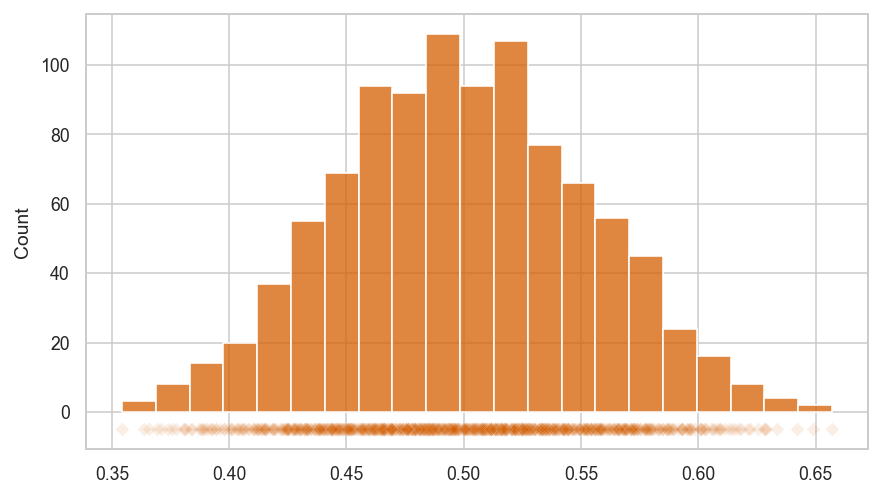

In [34]:
ubars = gen_sampling_dist(rvU, statfunc=mean, n=30, N=1000)
sns.histplot(ubars, color="r")
sns.scatterplot(x=ubars, y=-5, color="r", marker="D", alpha=0.1)

In [35]:
# filename = "figures/prob/sampling_dist_of_Ubar.pdf"
# plot_sampling_dist(ubars, xlims=[0.3,0.7], filename=filename)

We can compute the mean and the variance of the sampling distribution:

In [36]:
np.mean(ubars), np.std(ubars)

(0.49969249382156794, 0.052806874561502376)

In [37]:
# Spoiler:
# rvU.mean(), rvU.std()/np.sqrt(n)

### Example 2 (continued): sampling distribution of the mean

Let's define a random variable `rvZ` $\sim \mathcal{N}(\mu=0, \sigma=1)$.

In [38]:
from scipy.stats import norm

rvZ = norm(0, 1)

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

In [39]:
# filename = "figures/prob/samples_from_Z.pdf"
# nsamples_df = gen_samples(rvZ, n=30, N=10)
# plot_samples(nsamples_df, xlims=[-3,3], filename=filename)

**Visualizing the sampling distribution of the mean.**  
Let's now generate $N=1000$ samples $\mathbf{n}_1, \mathbf{n}_2, \mathbf{n}_3, \ldots, \mathbf{n}_N$, compute the mean of each sample $\overline{\mathbf{n}_1}, \overline{\mathbf{n}_2}, \overline{\mathbf{n}_3}, \ldots, \overline{\mathbf{n}_N}$,
then plot a histogram of the means.

In [40]:
N = 1000  # number of samples
n = 30    # sample size

zbars = []
for i in range(0, N):
    zsample = rvZ.rvs(n)
    zbar = mean(zsample)
    zbars.append(zbar)

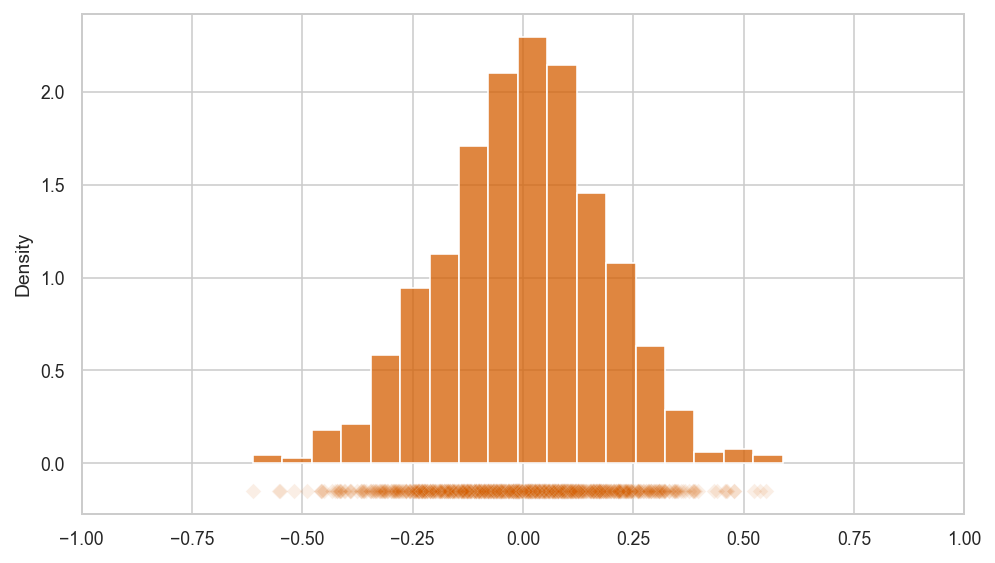

In [41]:
filename = "figures/prob/sampling_dist_of_Zbar.pdf"
plot_sampling_dist(zbars, xlims=[-1,1], filename=filename)

We can compute the mean and the variance of the sampling distribution:

In [42]:
np.mean(zbars), np.std(zbars)

(-0.000538137930258189, 0.1816961603826878)

In [43]:
# # Spoiler:
# rvZ.mean(), rvZ.std()/np.sqrt(n)

### Example 3 (continued): sampling distribution of the mean

Let's define a random variable `rvE` $\sim \textrm{Expon}(\lambda=0.2)$.

In [44]:
from scipy.stats import expon
lam = 0.2      # lambda
scale = 1/lam
rvE = expon(0, scale)

We now generate some 10 data samples of size $n=30$,
and plot the observations as a scatter plot.

In [45]:
# filename = "figures/prob/samples_from_Elambda02.pdf"
# esamples_df = gen_samples(rvE, n=30, N=10)
# plot_samples(esamples_df, xlims=[-0.1,30], filename=filename)

**Visualizing the sampling distribution of the mean.**  
We will now generate $N=1000$ samples $\mathbf{e}_1, \mathbf{e}_2, \mathbf{e}_3, \ldots, \mathbf{e}_N$, compute the mean of each sample $\overline{\mathbf{e}_1}, \overline{\mathbf{e}_2}, \overline{\mathbf{e}_3}, \ldots, \overline{\mathbf{e}_N}$.

In [46]:
N = 1000  # number of samples
n = 30    # sample size

ebars = []
for i in range(0, N):
    esample = rvE.rvs(n)
    ebar = mean(esample)
    ebars.append(ebar)

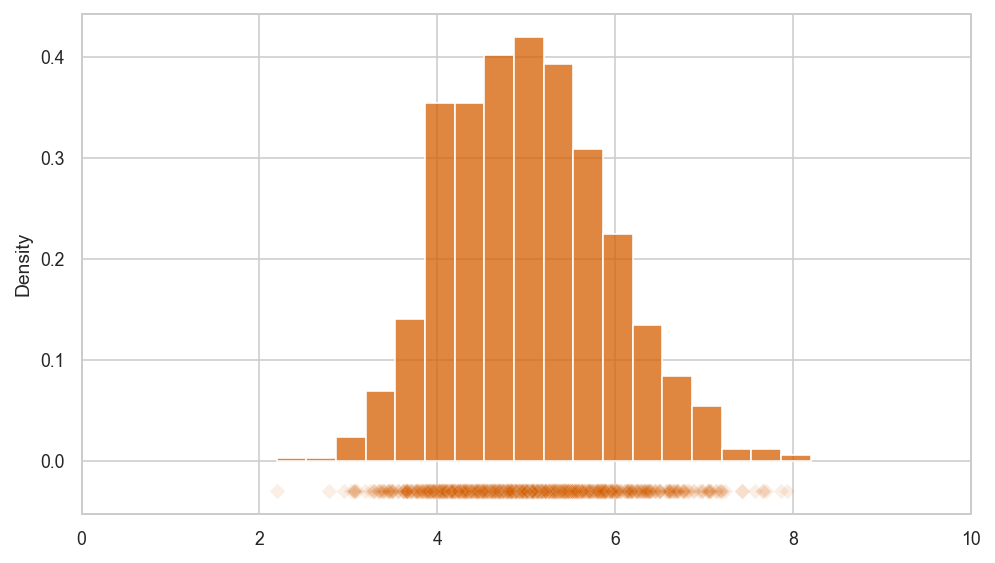

In [47]:
filename = "figures/prob/sampling_dist_of_Ebar.pdf"
plot_sampling_dist(ebars, xlims=[0,10], filename=filename)

We can compute the mean and the variance of the sampling distribution:

In [48]:
np.mean(ebars), np.std(ebars)

(5.020581648075875, 0.8950192303530723)

In [49]:
# # Spoiler
# rvE.mean(),  rvE.std()/np.sqrt(n)

## Central limit theorem

The *Central Limit Theorem* (CLT) is a mathy result tells us two very important practical facts:

1. The sampling distribution of the sample mean $\overline{X}$ is normally distributed for samples taken for ANY random variable, as the sample size $n$ increases.

2. The standard deviation of sampling distribution of the sample mean $\overline{X}$
   decrease $\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$,
   where $\sigma$ is the standard deviation of the random variable $X$.

Let's verify both claims of the CLT by revisiting the sampling distributions we obtained above.

### Example 1 (cont.): sampling distribution as a function of $n$

In [50]:
from scipy.stats import uniform

rvU = uniform(0,1)

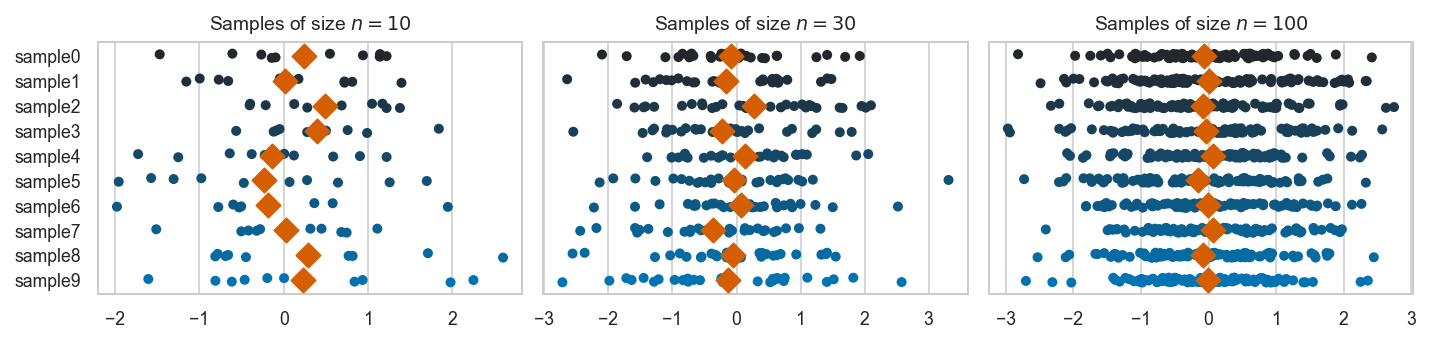

In [51]:
filename = "figures/prob/samples_from_U01_n10_n30_n100.pdf"
plot_samples_panel(rvZ, xlims=None, filename=filename)

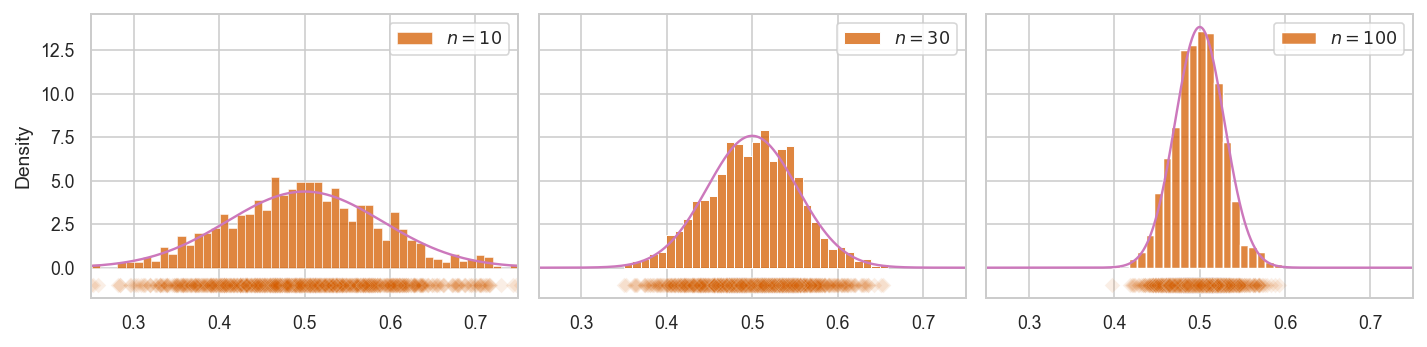

In [52]:
filename = "figures/prob/sampling_dist_of_Ubar_n10_n30_n100.pdf"
ubarss = plot_sampling_dists_panel(rvU, xlims=[0.25,0.75], binwidth=0.01, filename=filename)
ubars10, ubars30, ubars100 = ubarss

In [53]:
np.std(ubars10), np.std(ubars30), np.std(ubars100)

(0.08876309393179022, 0.052921634408483534, 0.028534029192829845)

Let's compare these observations from the 

In [54]:
from math import sqrt
rvU.std()/sqrt(10), rvU.std()/sqrt(30), rvU.std()/sqrt(100)

(0.09128709291752768, 0.05270462766947299, 0.028867513459481287)

### Example 2 (cont.): sampling distribution as a function of $n$

In [55]:
from scipy.stats import norm

mu = 0
sigma = 1
rvZ = norm(mu, sigma)

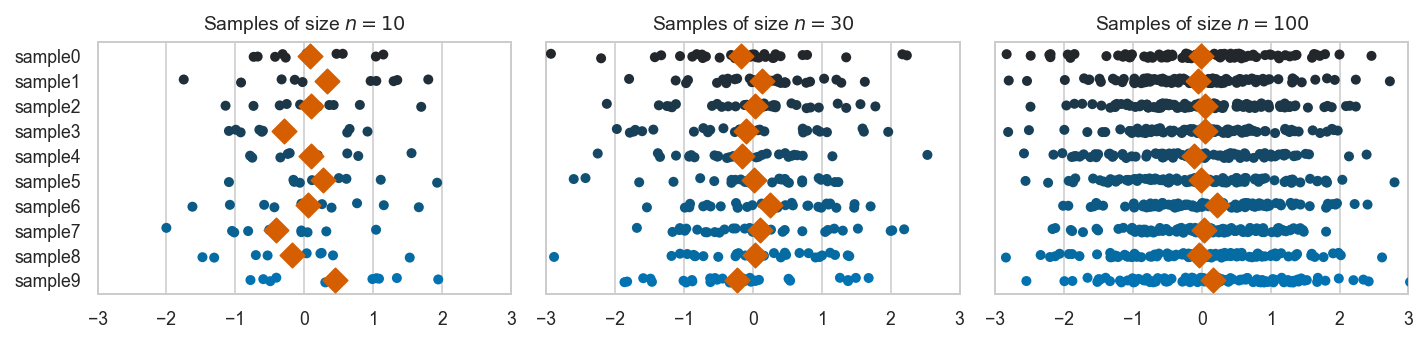

In [56]:
filename = "figures/prob/samples_from_Z_n10_n30_n100.pdf"
plot_samples_panel(rvZ, xlims=[-3, 3], filename=filename)

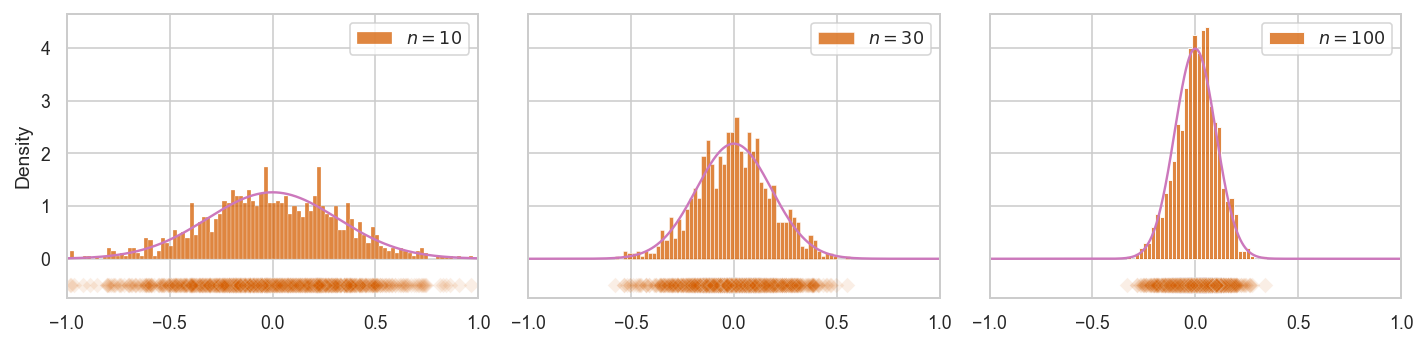

In [57]:
filename = "figures/prob/sampling_dist_of_Zbar_n10_n30_n100.pdf"
zbarss = plot_sampling_dists_panel(rvZ, xlims=[-1, 1], binwidth=0.02, filename=filename)
zbars10, zbars30, zbars100 = zbarss

In [58]:
np.std(zbars10), np.std(zbars30), np.std(zbars100)

(0.3254538753736802, 0.1817525174600758, 0.09908803320057201)

Let's compare these observations from the 

In [59]:
from math import sqrt
rvZ.std()/sqrt(10), rvZ.std()/sqrt(30), rvZ.std()/sqrt(100)

(0.31622776601683794, 0.18257418583505536, 0.1)

### Example 3 (cont.): sampling distribution as a function of $n$

In [60]:
from scipy.stats import expon

lam = 0.2      # lambda
scale = 1/lam
rvE = expon(0, scale)

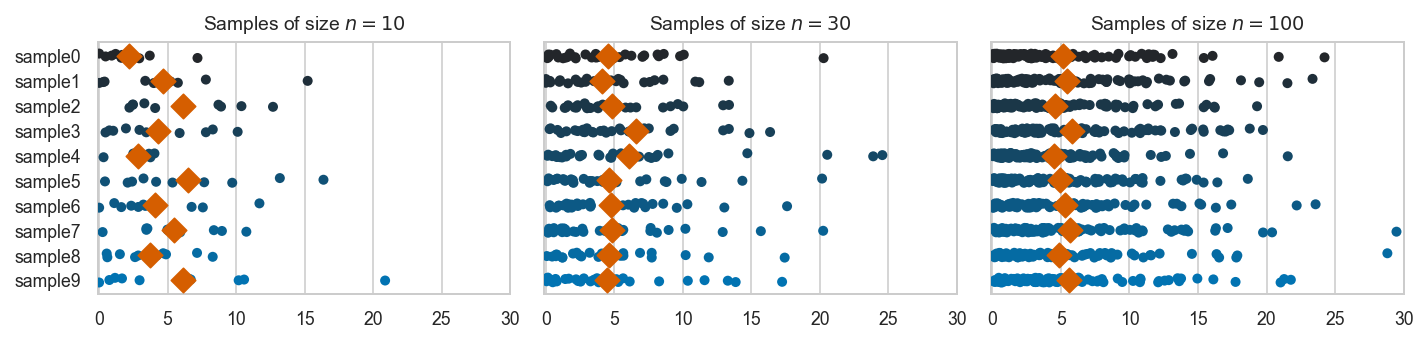

In [61]:
filename = "figures/prob/samples_from_Elambda02_n10_n30_n100.pdf"
plot_samples_panel(rvE, xlims=[-0.1,30], filename=filename)

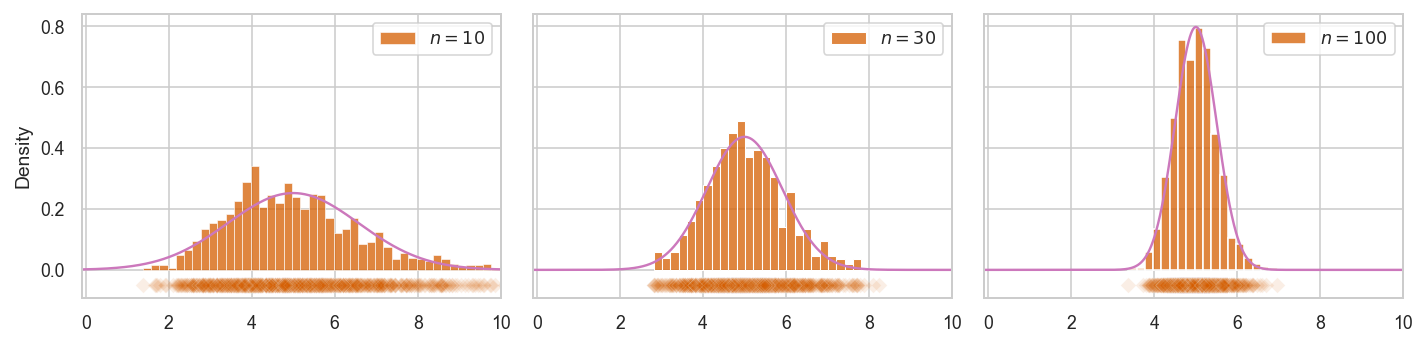

In [62]:
filename = "figures/prob/sampling_dist_of_Ebar_n10_n30_n100.pdf"
ebarss = plot_sampling_dists_panel(rvE, xlims=[-0.1, 10], binwidth=0.2, filename=filename)
ebars10, ebars30, ebars100 = ebarss

In [63]:
np.std(ebars10), np.std(ebars30), np.std(ebars100)

(1.606495292041251, 0.9458008411342298, 0.49518647082501677)

Let's compare these observations from the 

In [64]:
from math import sqrt

rvE.std()/sqrt(10), rvE.std()/sqrt(30), rvE.std()/sqrt(100)

(1.5811388300841895, 0.9128709291752769, 0.5)

## Discussion
CLT is the reason why statistics works. We can use properties of sample to estimate the parameters of the population, and our estimates get more and more accurate as the samples get larger.

## Exercises

See main text.